# LORENTZ ATTRACTOR

## Runge-Kutta

In [1]:
def rk4m(x,y,h,n):
    Xlist = [x]
    Ylist = [y]
    for i in range(n):
        k0=f(x,y)
        k1=f(x+h/2.0,y+(h/2)*k0)
        k2=f(x+h/2.0,y+(h/2)*k1)
        k3=f(x+h, y+h*k2)
        # yeni x ve y değerlerini hesapla
        y=y+(h/6)*(k0+2.0*k1+2.0*k2+k3)
        x=x+h
        # hesaplanan x ve y değerlerini
        # xd, yd listelerine ekle
        Xlist.append(x)
        Ylist.append(y)
    return Xlist, Ylist

## Solve the equations

In [3]:
# Aynı programın yeniden düzenlenmiş hali
import numpy as np

def f(x, y):
    # y[0]-->x, y[1]-->y, y[2]-->z
    dxdt =  sigma*(y[1] - y[0])
    dydt = -y[0]*y[2] + rr*y[0] - y[1]
    dzdt = y[0]*y[1] - bb*y[2]
    return np.array([dxdt, dydt, dzdt])

h = 0.01
n = 2000
dn = 500
x0 = 0.0
y0 = np.array([1., 1., 20.])

sigma, bb, rr = 10., 8./3., 28.
Xlist, Ylist = rk4m(x0, y0, h, n)

Ylist = np.array(Ylist)
Xs = Ylist[0:,0]
Ys = Ylist[0:,1]
Zs = Ylist[0:,2]

## Plot in 2D

         t            X            Y            Z
     0.000        1.000        1.000       20.000
     5.000       -8.968       -2.812       33.958
    10.000        3.253        5.626       12.418
    15.000        6.693        2.041       30.482


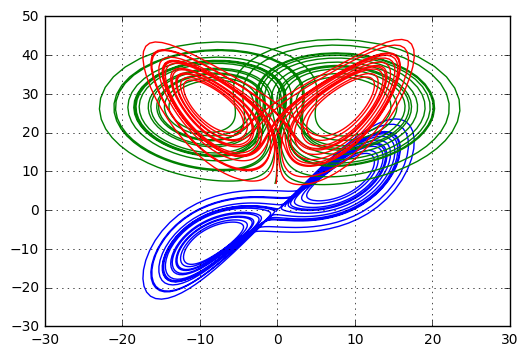

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

print "%10s %12s %12s %12s"%("t","X","Y","Z")
for i in range(0, n, dn):
    print "%10.3f %12.3f %12.3f %12.3f"%(Xlist[i], Xs[i], Ys[i], Zs[i])

plt.plot(Xs, Ys)
plt.plot(Ys, Zs)
plt.plot(Xs, Zs)
plt.grid()
plt.show()

## Plot in 3D

In [5]:
import plotly
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})